In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Economics/Data/avocado.csv')
df = df[df['region'] == 'SanFrancisco']
df = df.sort_values(by ='Date')
df = df[df['type'] == 'organic']
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11361,51,2015-01-04,1.18,22630.58,13175.57,9028.34,0.0,426.67,426.67,0.0,0.0,organic,2015,SanFrancisco
11360,50,2015-01-11,1.12,29676.78,17907.49,11586.46,0.0,182.83,182.83,0.0,0.0,organic,2015,SanFrancisco
11359,49,2015-01-18,1.27,41482.48,26336.41,14789.40,0.0,356.67,356.67,0.0,0.0,organic,2015,SanFrancisco
11358,48,2015-01-25,1.34,27146.81,17038.27,9879.87,0.0,228.67,228.67,0.0,0.0,organic,2015,SanFrancisco
11357,47,2015-02-01,1.06,57802.02,38413.44,19160.87,0.0,227.71,227.71,0.0,0.0,organic,2015,SanFrancisco


In [3]:
df['TotalVolume'] = df['Total Volume']
df = df[['Date', 'AveragePrice', 'TotalVolume']]

In [4]:
df['TotalVolumeChg'] =  df['TotalVolume'].diff()
df['PriceChg'] = df['AveragePrice'].diff()
df.head()

,Date,AveragePrice,TotalVolume,TotalVolumeChg,PriceChg
11361,2015-01-04,1.18,22630.58,NaN,NaN
11360,2015-01-11,1.12,29676.78,7046.20,-0.06
11359,2015-01-18,1.27,41482.48,11805.70,0.15
11358,2015-01-25,1.34,27146.81,-14335.67,0.07
11357,2015-02-01,1.06,57802.02,30655.21,-0.28


In [5]:
df['VolumePctChg'] = df['TotalVolumeChg'] / df['TotalVolume']
df['PricePctChg'] = df['PriceChg'] / df['AveragePrice'] 

In [6]:
df = df.dropna()
df.isnull().sum()

Date              0
AveragePrice      0
TotalVolume       0
TotalVolumeChg    0
PriceChg          0
VolumePctChg      0
PricePctChg       0
dtype: int64

In [7]:
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor, LinearRegression
x = df['VolumePctChg']
y = df['PricePctChg']
x = x.values.reshape(-1,1)
linear = LinearRegression()
linear.fit(x,y)
print('coefficients: ' + str(linear.coef_))
print('intercept: ' + str(linear.intercept_))
print('score: ' + str(linear.score(x,y)))

coefficients: [-0.26562135]
intercept: -0.0163955297285
score: 0.179452013198


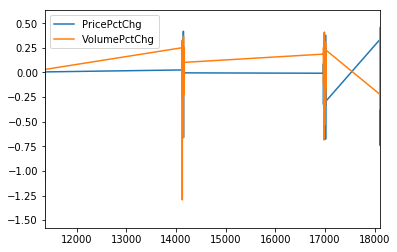

In [8]:
df[['PricePctChg', 'VolumePctChg']].plot()
plt.show()

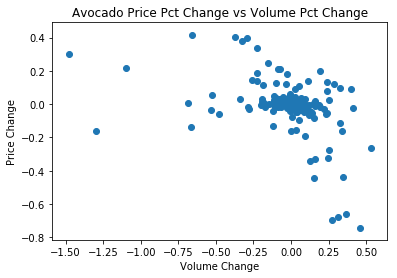

In [9]:
plt.scatter(y = df.PricePctChg, x = df.VolumePctChg)
plt.title('Avocado Price Pct Change vs Volume Pct Change')
plt.xlabel('Volume Change')
plt.ylabel('Price Change')
plt.show()

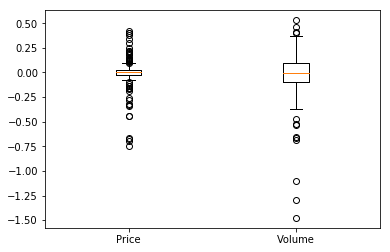

In [10]:
plt.boxplot([ df.PricePctChg, df.VolumePctChg])
plt.xticks([1,2], ['Price','Volume'])
plt.show()

In [11]:
hr = HuberRegressor()
hr.fit(x,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(x,y)))

coefficients: [-0.17723627]
intercept: -0.00192358713181
score: 0.153771361548


In [12]:
ransac = RANSACRegressor()
ransac.fit(x,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(x,y)))

coefficients: [-0.17723627]
intercept: -0.00192358713181
score: 0.153771361548


In [13]:
thielsan = TheilSenRegressor()
thielsan.fit(x,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(x,y)))

coefficients: [-0.17723627]
intercept: -0.00192358713181
score: 0.153771361548


In [14]:
from sklearn.linear_model import Ridge, Lasso

In [15]:
ridge = Ridge()
ridge.fit(x,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(x,y)))

coefficients: [-0.17723627]
intercept: -0.00192358713181
score: 0.153771361548


In [16]:
lasso = Lasso()
lasso.fit(x,y)
print('coefficients: ' + str(hr.coef_))
print('intercept: ' + str(hr.intercept_))
print('score: ' + str(hr.score(x,y)))

coefficients: [-0.17723627]
intercept: -0.00192358713181
score: 0.153771361548


In [17]:
# write up on https://docs.google.com/document/d/1qS6fpjDe_RJt9c_Hi20bqdoK7jmy24ozCyJZPHmPHwc/edit?usp=sharing

In [18]:
df.AveragePrice.describe()

count    168.000000
mean       2.217381
std        0.468426
min        1.060000
25%        1.957500
50%        2.295000
75%        2.582500
max        3.250000
Name: AveragePrice, dtype: float64

In [19]:
df.TotalVolume.describe()

count      168.000000
mean     22400.625655
std       7442.584349
min       8311.120000
25%      17702.892500
50%      21317.190000
75%      25494.775000
max      57802.020000
Name: TotalVolume, dtype: float64

In [21]:
df.VolumePctChg.describe()

count    168.000000
mean      -0.024254
std        0.258683
min       -1.477215
25%       -0.094727
50%       -0.000787
75%        0.093168
max        0.530348
Name: VolumePctChg, dtype: float64

In [22]:
df.PricePctChg.describe()

count    168.000000
mean      -0.009953
std        0.162202
min       -0.742424
25%       -0.021181
50%        0.000000
75%        0.026059
max        0.418502
Name: PricePctChg, dtype: float64